In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

In [2]:
## Let's not run the slow scripts *everytime*
run_everything = False

In [3]:
## Load data
%time train = pd.read_csv('./data/train.csv')
%time test = pd.read_csv('./data/test.csv')

### Use the first column as the label then remove from dataframe
label = train.label

del train['label']

print('Dimensions of training data:')
print(train.shape)

CPU times: user 3.4 s, sys: 408 ms, total: 3.81 s
Wall time: 3.87 s
CPU times: user 2.23 s, sys: 214 ms, total: 2.44 s
Wall time: 2.48 s
Dimensions of training data:
(42000, 784)


# Naive Bayes

In [4]:
### Let's just try to use bayes

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, label, random_state=2)


mnb_cf = MultinomialNB()
mnb_cf.fit(X_train, y_train)

y_hat = mnb_cf.predict(X_test)

print(accuracy_score(y_test, y_hat))

gnb_cf = GaussianNB()
gnb_cf.fit(X_train, y_train)

y_hat = gnb_cf.predict(X_test)

print(accuracy_score(y_test, y_hat))


bnb_cf = BernoulliNB()
bnb_cf.fit(X_train, y_train)

y_hat = bnb_cf.predict(X_test)

print(accuracy_score(y_test, y_hat))



0.822666666667
0.561333333333
0.831904761905


# Beginner's Approach to classification

Based on https://www.kaggle.com/archaeocharlie/a-beginner-s-approach-to-classification

## Viewing image 

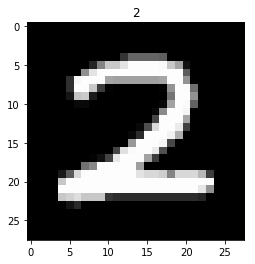

In [5]:
i=1
img=X_train.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_train.iloc[i])
plt.show()

## Examining pixels

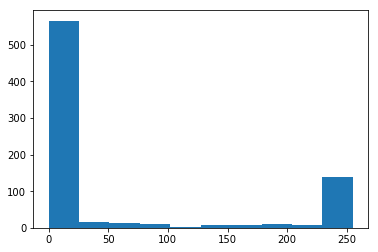

In [6]:
plt.hist(X_train.loc[i])
plt.show()

# Stochastic Gradient Decent

In [7]:
clf = SGDClassifier()
if run_everything:
    clf.fit(X_train, y_train.values.ravel())
    clf.score(X_test, y_test)
else:
    print(0.88219047619047619)

0.8821904761904762


# KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
if run_everything:
    nbr = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
    nbr.fit(X_train, y_train.values)

    %time nbr.score(X_test, y_test)
else:
    print('2min 3s')
    print(0.9656190476190476)

2min 3s
0.9656190476190476


## Create Submission

Just call `create_output_csv` and pass in the model you wish to test on.

In [9]:
def create_output_csv(model):
    y_hat = model.predict(test)
    df = pd.DataFrame({'ImageId': range(1,len(y_hat)+1), 'Label': y_hat})
    df.to_csv('submission.csv', index=False)
create_output_csv(bnb_cf)

print('Submission file saved to submission.csv')

Submission file saved to submission.csv
